In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv('/workspaces/projects/Loan_Default_Probability/Loan_default.csv')
df.head().T

,0,1,2,3,4
LoanID,I38PQUQS96,HPSK72WA7R,C1OZ6DPJ8Y,V2KKSFM3UN,EY08JDHTZP
Age,56,69,46,32,60
Income,85994,50432,84208,31713,20437
LoanAmount,50587,124440,129188,44799,9139
CreditScore,520,458,451,743,633
MonthsEmployed,80,15,26,0,8
NumCreditLines,4,1,3,3,4
InterestRate,15.23,4.81,21.17,7.07,6.51
LoanTerm,36,60,24,24,48
DTIRatio,0.44,0.68,0.31,0.23,0.73


In [5]:
df=df.iloc[:len(df)//5]
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51064,Y3YNPBI0D6,22,42466,169622,602,63,4,3.36,48,0.20,Bachelor's,Full-time,Single,Yes,No,Business,No,0
51065,2PKR2RSOR7,56,24007,86669,454,86,2,6.12,60,0.82,Bachelor's,Full-time,Married,Yes,No,Business,No,0
51066,728XPMV2X9,21,97179,198968,374,102,4,3.85,24,0.41,Bachelor's,Part-time,Divorced,Yes,Yes,Education,No,0
51067,KBPW3YPAYB,57,124131,233025,718,84,4,3.08,48,0.52,Bachelor's,Unemployed,Married,Yes,Yes,Home,Yes,0


In [6]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51069 entries, 0 to 51068
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          51069 non-null  object 
 1   Age             51069 non-null  int64  
 2   Income          51069 non-null  int64  
 3   LoanAmount      51069 non-null  int64  
 4   CreditScore     51069 non-null  int64  
 5   MonthsEmployed  51069 non-null  int64  
 6   NumCreditLines  51069 non-null  int64  
 7   InterestRate    51069 non-null  float64
 8   LoanTerm        51069 non-null  int64  
 9   DTIRatio        51069 non-null  float64
 10  Education       51069 non-null  object 
 11  EmploymentType  51069 non-null  object 
 12  MaritalStatus   51069 non-null  object 
 13  HasMortgage     51069 non-null  object 
 14  HasDependents   51069 non-null  object 
 15  LoanPurpose     51069 non-null  object 
 16  HasCoSigner     51069 non-null  object 
 17  Default         51069 non-null 

In [8]:
num = df.select_dtypes(['int64','float64']).columns.to_list()
num

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Default']

<Axes: >

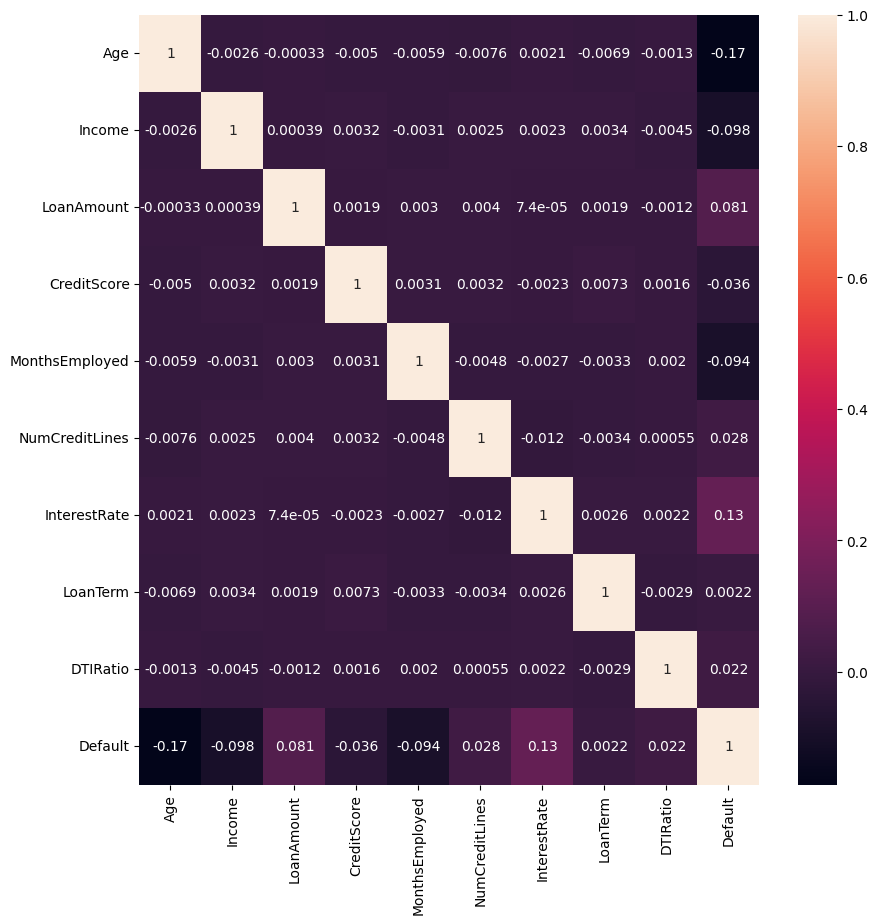

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(),annot=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51069 entries, 0 to 51068
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          51069 non-null  object 
 1   Age             51069 non-null  int64  
 2   Income          51069 non-null  int64  
 3   LoanAmount      51069 non-null  int64  
 4   CreditScore     51069 non-null  int64  
 5   MonthsEmployed  51069 non-null  int64  
 6   NumCreditLines  51069 non-null  int64  
 7   InterestRate    51069 non-null  float64
 8   LoanTerm        51069 non-null  int64  
 9   DTIRatio        51069 non-null  float64
 10  Education       51069 non-null  object 
 11  EmploymentType  51069 non-null  object 
 12  MaritalStatus   51069 non-null  object 
 13  HasMortgage     51069 non-null  object 
 14  HasDependents   51069 non-null  object 
 15  LoanPurpose     51069 non-null  object 
 16  HasCoSigner     51069 non-null  object 
 17  Default         51069 non-null 

In [11]:
df= df[['Education','LoanTerm','CreditScore','Income','InterestRate','LoanAmount','MonthsEmployed','LoanPurpose','EmploymentType','Default']]
df

,Education,LoanTerm,CreditScore,Income,InterestRate,LoanAmount,MonthsEmployed,LoanPurpose,EmploymentType,Default
0,Bachelor's,36,520,85994,15.23,50587,80,Other,Full-time,0
1,Master's,60,458,50432,4.81,124440,15,Other,Full-time,0
2,Master's,24,451,84208,21.17,129188,26,Auto,Unemployed,1
3,High School,24,743,31713,7.07,44799,0,Business,Full-time,0
4,Bachelor's,48,633,20437,6.51,9139,8,Auto,Unemployed,0
...,...,...,...,...,...,...,...,...,...,...
51064,Bachelor's,48,602,42466,3.36,169622,63,Business,Full-time,0
51065,Bachelor's,60,454,24007,6.12,86669,86,Business,Full-time,0
51066,Bachelor's,24,374,97179,3.85,198968,102,Education,Part-time,0
51067,Bachelor's,48,718,124131,3.08,233025,84,Home,Unemployed,0


In [12]:
df.select_dtypes('object')

,Education,LoanPurpose,EmploymentType
0,Bachelor's,Other,Full-time
1,Master's,Other,Full-time
2,Master's,Auto,Unemployed
3,High School,Business,Full-time
4,Bachelor's,Auto,Unemployed
...,...,...,...
51064,Bachelor's,Business,Full-time
51065,Bachelor's,Business,Full-time
51066,Bachelor's,Education,Part-time
51067,Bachelor's,Home,Unemployed


In [13]:
df

,Education,LoanTerm,CreditScore,Income,InterestRate,LoanAmount,MonthsEmployed,LoanPurpose,EmploymentType,Default
0,Bachelor's,36,520,85994,15.23,50587,80,Other,Full-time,0
1,Master's,60,458,50432,4.81,124440,15,Other,Full-time,0
2,Master's,24,451,84208,21.17,129188,26,Auto,Unemployed,1
3,High School,24,743,31713,7.07,44799,0,Business,Full-time,0
4,Bachelor's,48,633,20437,6.51,9139,8,Auto,Unemployed,0
...,...,...,...,...,...,...,...,...,...,...
51064,Bachelor's,48,602,42466,3.36,169622,63,Business,Full-time,0
51065,Bachelor's,60,454,24007,6.12,86669,86,Business,Full-time,0
51066,Bachelor's,24,374,97179,3.85,198968,102,Education,Part-time,0
51067,Bachelor's,48,718,124131,3.08,233025,84,Home,Unemployed,0


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
X = df.drop('Default', axis=1)
y = df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [16]:
# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [20]:
models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('KNeighbors', KNeighborsClassifier()),
    ('GaussianNB', GaussianNB())
]

In [21]:
# Create and evaluate a pipeline for each model
for model_name, model in models:
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the model on the training data
    pipe.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipe.predict(X_test)

    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')


RandomForest Accuracy: 0.8817
LogisticRegression Accuracy: 0.8831
KNeighbors Accuracy: 0.8710
GaussianNB Accuracy: 0.8829


In [22]:
'''from sklearn.ensemble import VotingClassifier
model1 = CatBoostClassifier(iterations=100, random_state=42, verbose=False)
model2 = XGBClassifier(random_state=42)
model3 = RandomForestClassifier(random_state=42)
model4 = LogisticRegression(random_state=42)
model5 = KNeighborsClassifier()
model6 = GaussianNB()

ensemble = VotingClassifier(estimators=[
    ('catboost', model1),
    ('xgboost', model2),
    ('random_forest', model3),
    ('logistic_regression', model4),
    ('k_neighbors', model5),
    ('gaussian_nb', model6)
], voting='hard')
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ensemble)
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precision: {accuracy * 100:.2f}%')'''

"from sklearn.ensemble import VotingClassifier\nmodel1 = CatBoostClassifier(iterations=100, random_state=42, verbose=False)\nmodel2 = XGBClassifier(random_state=42)\nmodel3 = RandomForestClassifier(random_state=42)\nmodel4 = LogisticRegression(random_state=42)\nmodel5 = KNeighborsClassifier()\nmodel6 = GaussianNB()\n\nensemble = VotingClassifier(estimators=[\n    ('catboost', model1),\n    ('xgboost', model2),\n    ('random_forest', model3),\n    ('logistic_regression', model4),\n    ('k_neighbors', model5),\n    ('gaussian_nb', model6)\n], voting='hard')\npipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('model', ensemble)\n])\n\n# Fit the model on the training data\npipeline.fit(X_train, y_train)\ny_pred = pipeline.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint(f'Precision: {accuracy * 100:.2f}%')"

In [23]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

In [24]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['LoanTerm', 'CreditScore', 'Income', 'InterestRate', 'LoanAmount',
       'MonthsEmployed'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Education', 'LoanPurpose', 'EmploymentType'], dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [25]:
import joblib
joblib.dump(pipeline, 'pipe.joblib')

['pipe.joblib']